In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
coca_df=pd.read_csv("CocaCola_Sales_Rawdata.csv") 
coca_df.head()

,Quarter,Qtr_Date,Sales
0,Q1_86,3/31/1986,1734.827000
1,Q2_86,6/30/1986,2244.960999
2,Q3_86,9/30/1986,2533.804993
3,Q4_86,12/31/1986,2154.962997
4,Q1_87,3/31/1987,1547.818996


In [3]:
coca_df.info()
from datetime import datetime as dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Qtr_Date  42 non-null     object 
 2   Sales     42 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [4]:
 # to interpolate on a montly basis
coca_df['Qtr_Date'] = pd.to_datetime(coca_df['Qtr_Date']).dt.to_period('m')
coca_df['Sales'] /=  3

coca_df = coca_df.iloc[coca_df.index.repeat(3)]

coca_df['Qtr_Date'] = (coca_df['Qtr_Date'].sub(coca_df.groupby(level=0)
                                    .cumcount(ascending=False))
                   .dt.to_timestamp(how='e').dt.normalize())

coca_df =coca_df.reset_index(drop=True)
print (coca_df)

    Quarter   Qtr_Date        Sales
0     Q1_86 1986-01-31   578.275667
1     Q1_86 1986-02-28   578.275667
2     Q1_86 1986-03-31   578.275667
3     Q2_86 1986-04-30   748.320333
4     Q2_86 1986-05-31   748.320333
..      ...        ...          ...
121   Q1_96 1996-02-29  1398.000000
122   Q1_96 1996-03-31  1398.000000
123   Q2_96 1996-04-30  1751.000000
124   Q2_96 1996-05-31  1751.000000
125   Q2_96 1996-06-30  1751.000000

[126 rows x 3 columns]


In [5]:
coca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Quarter   126 non-null    object        
 1   Qtr_Date  126 non-null    datetime64[ns]
 2   Sales     126 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.1+ KB


In [6]:
coca_df

,Quarter,Qtr_Date,Sales
0,Q1_86,1986-01-31,578.275667
1,Q1_86,1986-02-28,578.275667
2,Q1_86,1986-03-31,578.275667
3,Q2_86,1986-04-30,748.320333
4,Q2_86,1986-05-31,748.320333
...,...,...,...
121,Q1_96,1996-02-29,1398.000000
122,Q1_96,1996-03-31,1398.000000
123,Q2_96,1996-04-30,1751.000000
124,Q2_96,1996-05-31,1751.000000


In [7]:
from datetime import datetime as dt
coca_df["Date"] = pd.to_datetime(coca_df.Qtr_Date,format="%b-%y")

coca_df["month"] = coca_df.Date.dt.strftime("%b") # month extraction
coca_df["year"] = coca_df.Date.dt.strftime("%Y") # year extraction

In [8]:
coca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Quarter   126 non-null    object        
 1   Qtr_Date  126 non-null    datetime64[ns]
 2   Sales     126 non-null    float64       
 3   Date      126 non-null    datetime64[ns]
 4   month     126 non-null    object        
 5   year      126 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 6.0+ KB


<AxesSubplot:>

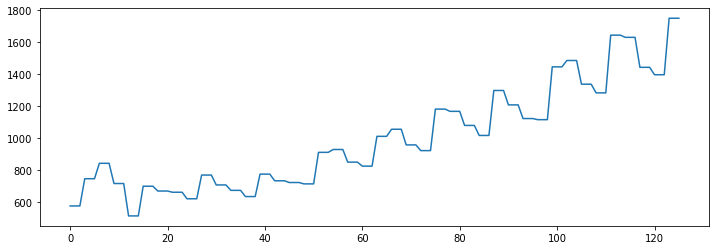

In [9]:
plt.figure(figsize=(12,4))
coca_df.Sales.plot()

<AxesSubplot:xlabel='month', ylabel='year'>

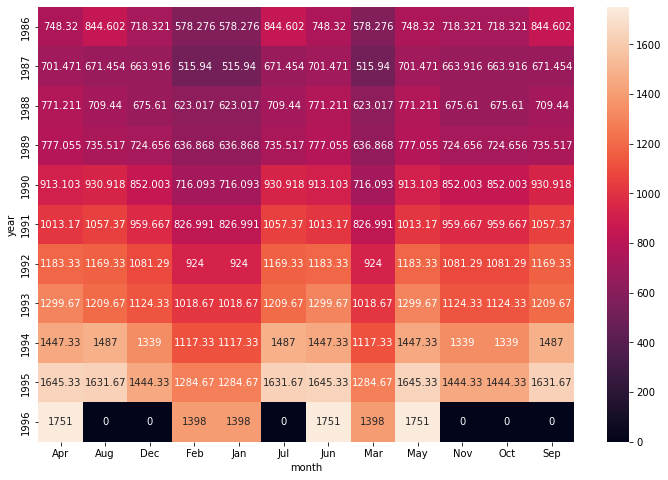

In [10]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=coca_df,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Sales'>

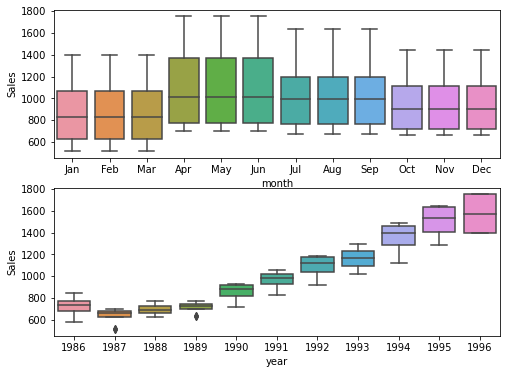

In [11]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=coca_df)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=coca_df) 
 

In [12]:
coca_df.describe()

,Sales
count,126.000000
mean,998.117769
std,323.358634
min,515.939665
25%,718.320999
50%,927.459000
75%,1209.666667
max,1751.000000


In [13]:
coca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Quarter   126 non-null    object        
 1   Qtr_Date  126 non-null    datetime64[ns]
 2   Sales     126 non-null    float64       
 3   Date      126 non-null    datetime64[ns]
 4   month     126 non-null    object        
 5   year      126 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 6.0+ KB


In [14]:
coca_df.head()

,Quarter,Qtr_Date,Sales,Date,month,year
0,Q1_86,1986-01-31,578.275667,1986-01-31,Jan,1986
1,Q1_86,1986-02-28,578.275667,1986-02-28,Feb,1986
2,Q1_86,1986-03-31,578.275667,1986-03-31,Mar,1986
3,Q2_86,1986-04-30,748.320333,1986-04-30,Apr,1986
4,Q2_86,1986-05-31,748.320333,1986-05-31,May,1986


In [15]:
#air_df['Passengers']=air_df['Passengers'].astype('int16')

<AxesSubplot:>

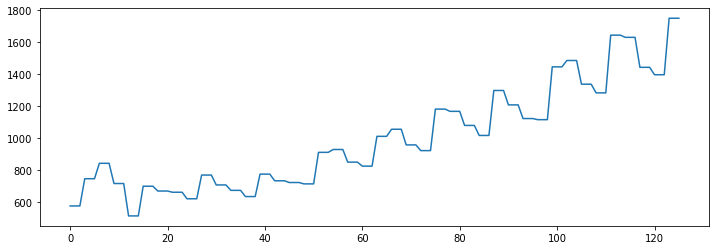

In [16]:
plt.figure(figsize=(12,4))
coca_df.Sales.plot()

# Splitting data

In [17]:
Train = coca_df.head(100)
Test =coca_df.tail(26)


# Moving Average 

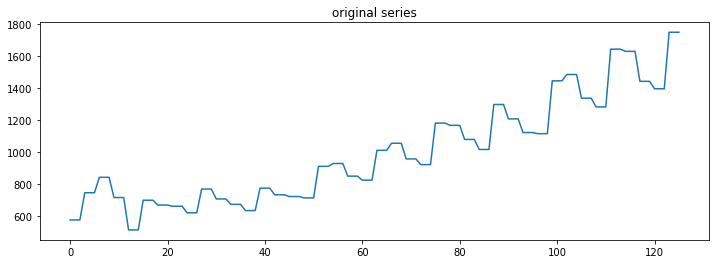

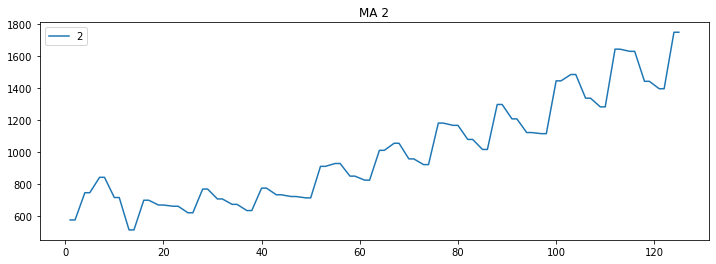

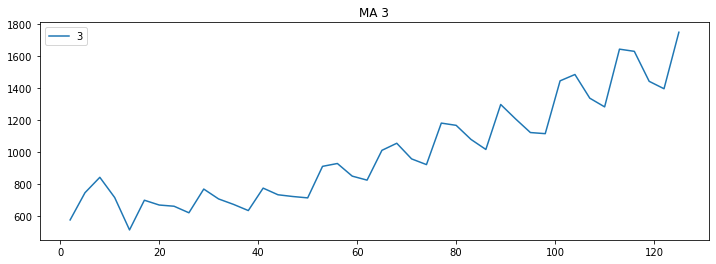

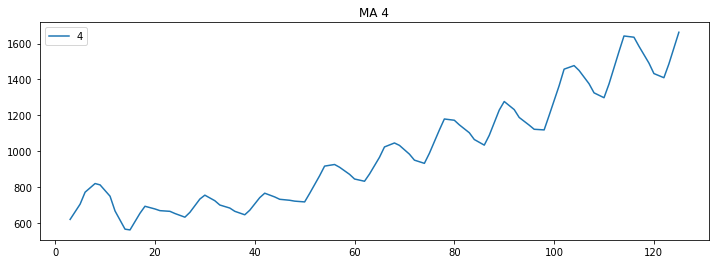

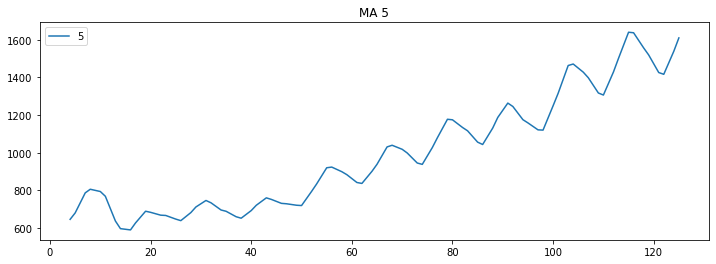

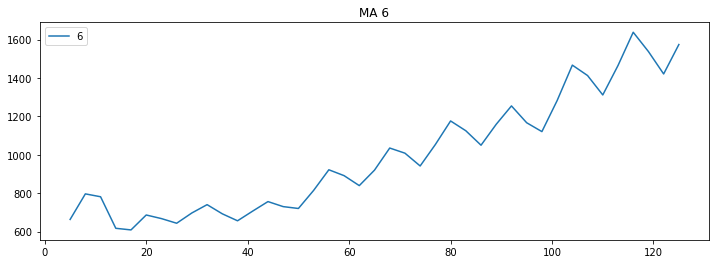

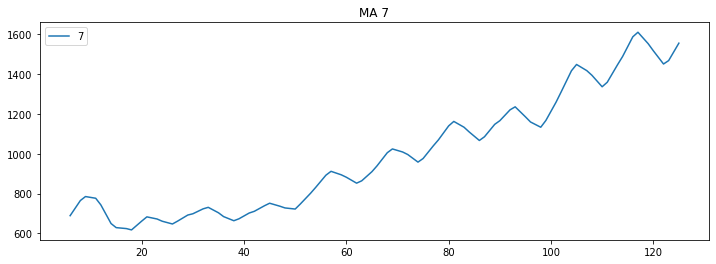

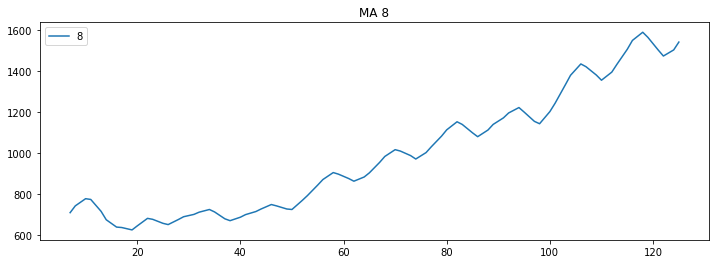

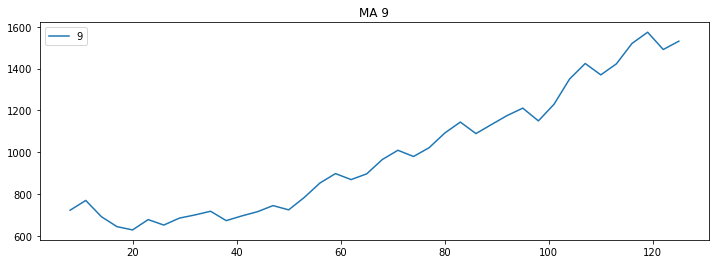

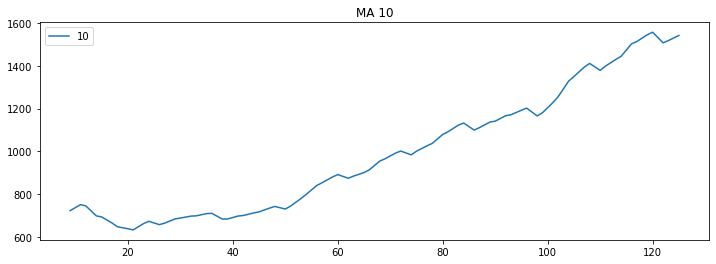

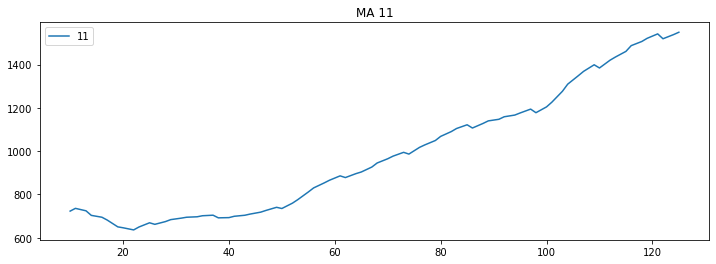

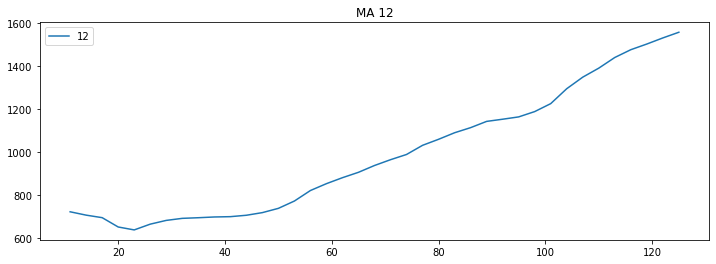

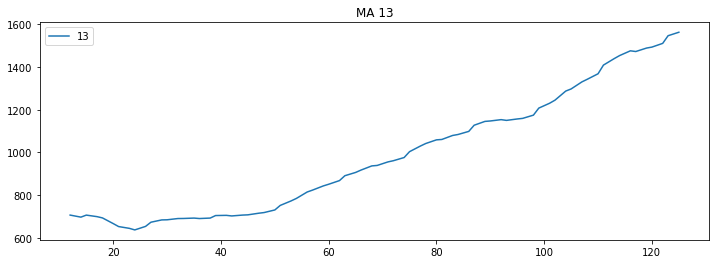

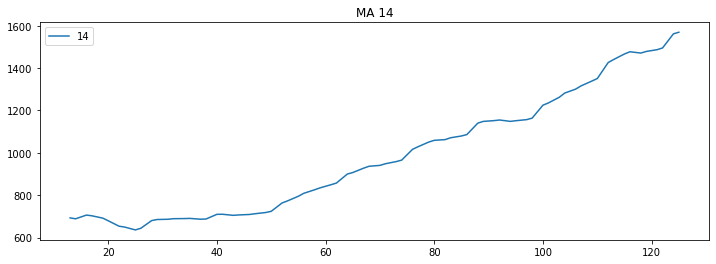

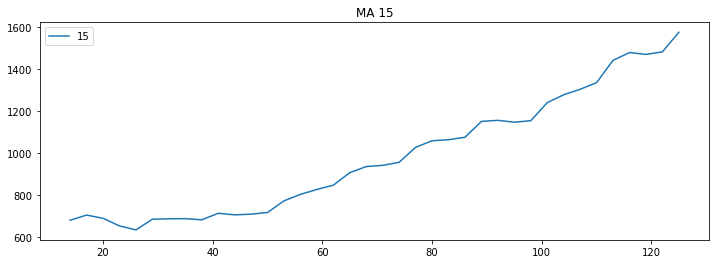

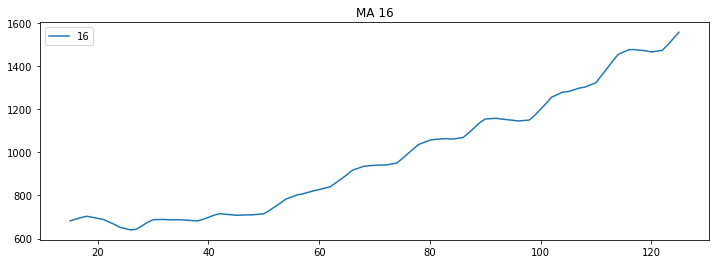

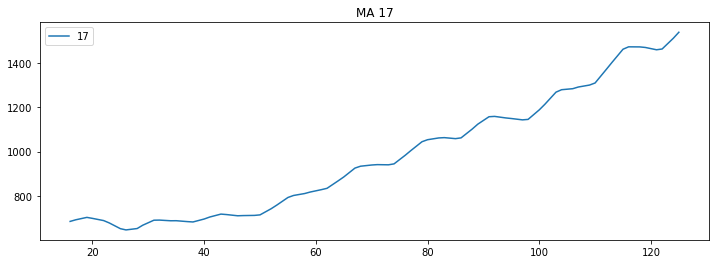

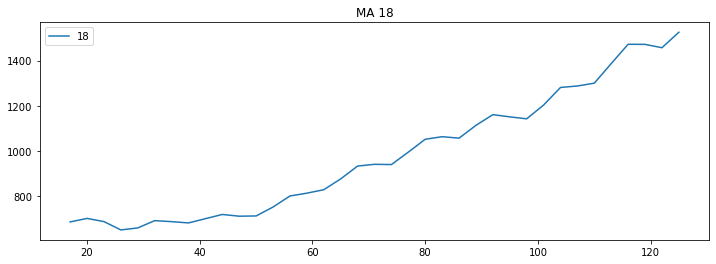

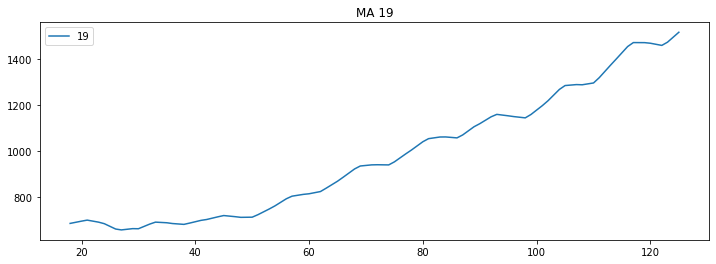

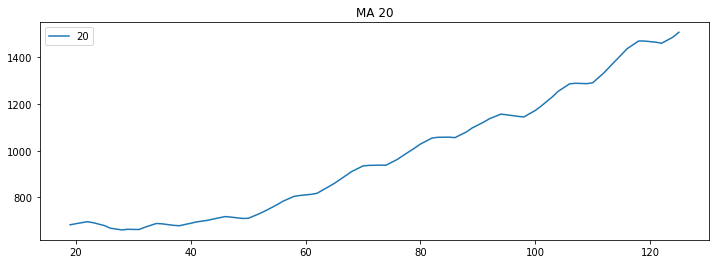

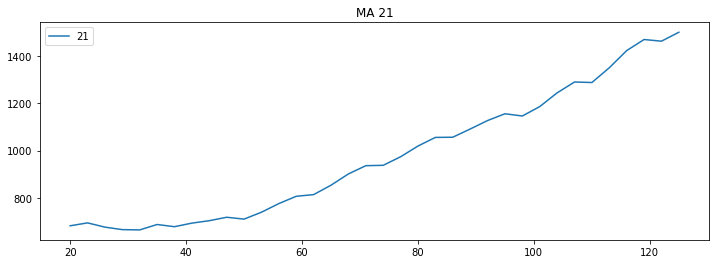

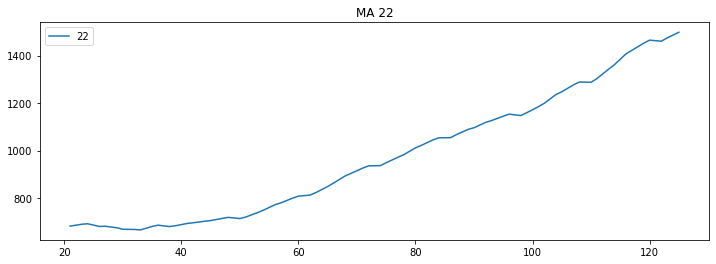

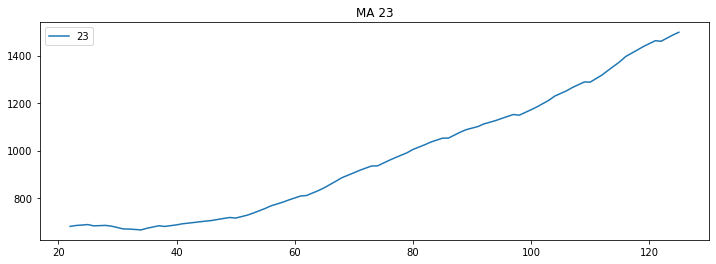

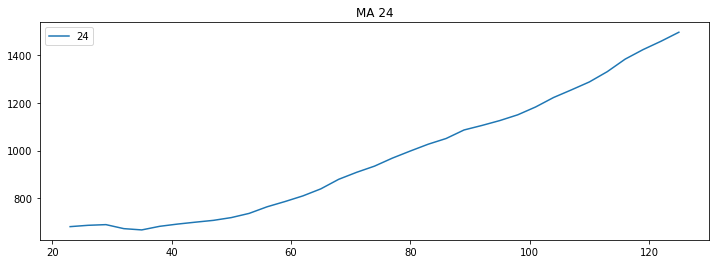

In [18]:
plt.figure(figsize=(12,4))
coca_df.Sales.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    coca_df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot 

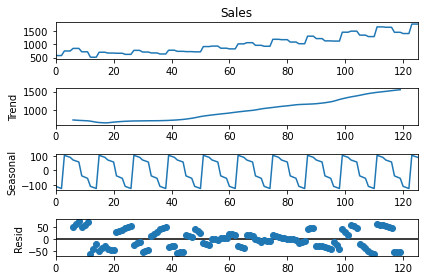

In [19]:
decompose_ts_add = seasonal_decompose(coca_df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

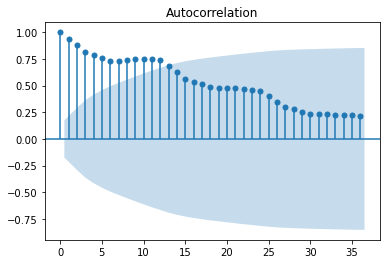

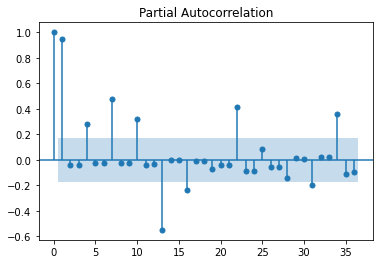

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca_df.Sales,lags=36)
tsa_plots.plot_pacf(coca_df.Sales,lags=36)
plt.show()


<AxesSubplot:xlabel='year', ylabel='Sales'>

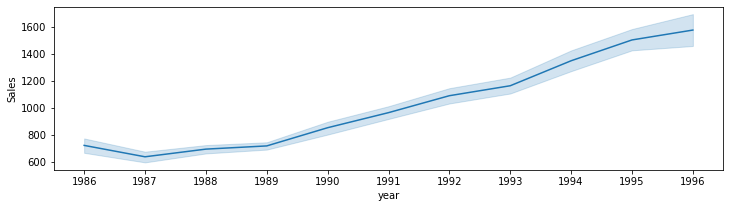

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=coca_df) 

In [22]:
t=range (1, 127)
coca_df['t']=t

In [23]:
coca_df['t_square']=coca_df['t']**2 

In [24]:
coca_df['natural_log'] = np.log(coca_df['Sales'])

In [25]:
coca_df

,Quarter,Qtr_Date,Sales,Date,month,year,t,t_square,natural_log
0,Q1_86,1986-01-31,578.275667,1986-01-31,Jan,1986,1,1,6.360051
1,Q1_86,1986-02-28,578.275667,1986-02-28,Feb,1986,2,4,6.360051
2,Q1_86,1986-03-31,578.275667,1986-03-31,Mar,1986,3,9,6.360051
3,Q2_86,1986-04-30,748.320333,1986-04-30,Apr,1986,4,16,6.617831
4,Q2_86,1986-05-31,748.320333,1986-05-31,May,1986,5,25,6.617831
...,...,...,...,...,...,...,...,...,...
121,Q1_96,1996-02-29,1398.000000,1996-02-29,Feb,1996,122,14884,7.242798
122,Q1_96,1996-03-31,1398.000000,1996-03-31,Mar,1996,123,15129,7.242798
123,Q2_96,1996-04-30,1751.000000,1996-04-30,Apr,1996,124,15376,7.467942
124,Q2_96,1996-05-31,1751.000000,1996-05-31,May,1996,125,15625,7.467942


In [26]:
one_hot_encoded_data = pd.get_dummies(coca_df, columns = ['month'])


In [27]:
one_hot_encoded_data 

,Quarter,Qtr_Date,Sales,Date,year,t,t_square,natural_log,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,Q1_86,1986-01-31,578.275667,1986-01-31,1986,1,1,6.360051,0,0,0,0,1,0,0,0,0,0,0,0
1,Q1_86,1986-02-28,578.275667,1986-02-28,1986,2,4,6.360051,0,0,0,1,0,0,0,0,0,0,0,0
2,Q1_86,1986-03-31,578.275667,1986-03-31,1986,3,9,6.360051,0,0,0,0,0,0,0,1,0,0,0,0
3,Q2_86,1986-04-30,748.320333,1986-04-30,1986,4,16,6.617831,1,0,0,0,0,0,0,0,0,0,0,0
4,Q2_86,1986-05-31,748.320333,1986-05-31,1986,5,25,6.617831,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Q1_96,1996-02-29,1398.000000,1996-02-29,1996,122,14884,7.242798,0,0,0,1,0,0,0,0,0,0,0,0
122,Q1_96,1996-03-31,1398.000000,1996-03-31,1996,123,15129,7.242798,0,0,0,0,0,0,0,1,0,0,0,0
123,Q2_96,1996-04-30,1751.000000,1996-04-30,1996,124,15376,7.467942,1,0,0,0,0,0,0,0,0,0,0,0
124,Q2_96,1996-05-31,1751.000000,1996-05-31,1996,125,15625,7.467942,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
one_hot_encoded_data.rename(columns = {'month_Jan':'Jan','month_Feb':'Feb','month_Mar':'Mar','month_Apr':'Apr','month_May':'May','month_Jun':'Jun','month_Jul':'Jul','month_Aug':'Aug','month_Sep':'Sep','month_Oct':'Oct','month_Nov':'Nov','month_Dec':'Dec'}, inplace = True)

In [29]:
one_hot_encoded_data

,Quarter,Qtr_Date,Sales,Date,year,t,t_square,natural_log,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Q1_86,1986-01-31,578.275667,1986-01-31,1986,1,1,6.360051,0,0,0,0,1,0,0,0,0,0,0,0
1,Q1_86,1986-02-28,578.275667,1986-02-28,1986,2,4,6.360051,0,0,0,1,0,0,0,0,0,0,0,0
2,Q1_86,1986-03-31,578.275667,1986-03-31,1986,3,9,6.360051,0,0,0,0,0,0,0,1,0,0,0,0
3,Q2_86,1986-04-30,748.320333,1986-04-30,1986,4,16,6.617831,1,0,0,0,0,0,0,0,0,0,0,0
4,Q2_86,1986-05-31,748.320333,1986-05-31,1986,5,25,6.617831,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Q1_96,1996-02-29,1398.000000,1996-02-29,1996,122,14884,7.242798,0,0,0,1,0,0,0,0,0,0,0,0
122,Q1_96,1996-03-31,1398.000000,1996-03-31,1996,123,15129,7.242798,0,0,0,0,0,0,0,1,0,0,0,0
123,Q2_96,1996-04-30,1751.000000,1996-04-30,1996,124,15376,7.467942,1,0,0,0,0,0,0,0,0,0,0,0
124,Q2_96,1996-05-31,1751.000000,1996-05-31,1996,125,15625,7.467942,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
# to rearrange the columns
one_hot_encoded_data=one_hot_encoded_data[['Quarter','Qtr_Date','Sales','Date','year','t','t_square','natural_log','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [31]:
one_hot_encoded_data['t']=one_hot_encoded_data['t'].astype('int8')
one_hot_encoded_data['t_square']=one_hot_encoded_data['t_square'].astype('int16')

In [32]:
for i in one_hot_encoded_data.columns[8:20]:
    one_hot_encoded_data[i]=one_hot_encoded_data[i].astype('int8')

In [33]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Quarter      126 non-null    object        
 1   Qtr_Date     126 non-null    datetime64[ns]
 2   Sales        126 non-null    float64       
 3   Date         126 non-null    datetime64[ns]
 4   year         126 non-null    object        
 5   t            126 non-null    int8          
 6   t_square     126 non-null    int16         
 7   natural_log  126 non-null    float64       
 8   Jan          126 non-null    int8          
 9   Feb          126 non-null    int8          
 10  Mar          126 non-null    int8          
 11  Apr          126 non-null    int8          
 12  May          126 non-null    int8          
 13  Jun          126 non-null    int8          
 14  Jul          126 non-null    int8          
 15  Aug          126 non-null    int8          
 16  Sep     

In [34]:
Train = one_hot_encoded_data.head(100)
Test = one_hot_encoded_data.tail(26)


In [35]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Quarter      126 non-null    object        
 1   Qtr_Date     126 non-null    datetime64[ns]
 2   Sales        126 non-null    float64       
 3   Date         126 non-null    datetime64[ns]
 4   year         126 non-null    object        
 5   t            126 non-null    int8          
 6   t_square     126 non-null    int16         
 7   natural_log  126 non-null    float64       
 8   Jan          126 non-null    int8          
 9   Feb          126 non-null    int8          
 10  Mar          126 non-null    int8          
 11  Apr          126 non-null    int8          
 12  May          126 non-null    int8          
 13  Jun          126 non-null    int8          
 14  Jul          126 non-null    int8          
 15  Aug          126 non-null    int8          
 16  Sep     

In [36]:
one_hot_encoded_data.head()

,Quarter,Qtr_Date,Sales,Date,year,t,t_square,natural_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Q1_86,1986-01-31,578.275667,1986-01-31,1986,1,1,6.360051,1,0,0,0,0,0,0,0,0,0,0,0
1,Q1_86,1986-02-28,578.275667,1986-02-28,1986,2,4,6.360051,0,1,0,0,0,0,0,0,0,0,0,0
2,Q1_86,1986-03-31,578.275667,1986-03-31,1986,3,9,6.360051,0,0,1,0,0,0,0,0,0,0,0,0
3,Q2_86,1986-04-30,748.320333,1986-04-30,1986,4,16,6.617831,0,0,0,1,0,0,0,0,0,0,0,0
4,Q2_86,1986-05-31,748.320333,1986-05-31,1986,5,25,6.617831,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#Linear Model
import statsmodels.formula.api as smf 
Train = one_hot_encoded_data.head(100)
Test = one_hot_encoded_data.tail(26)

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

259.3193085294554

In [38]:
#Exponential

Exp = smf.ols('Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


inf

In [39]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

138.94561900516936

In [40]:
#Additive seasonality
add_sea=smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

626.8114963414284

In [41]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

78.59316209120618

In [42]:
##Multiplicative Seasonality

Mul_sea = smf.ols('natural_log~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

648.4528857523455

In [43]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('natural_log~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

140.37971838578915

In [44]:
from sklearn.metrics import mean_squared_error
import math

### Simple Exponential Method
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])

MSE1 = mean_squared_error(Test.Sales,pred_ses)
 
RMSE1 = math.sqrt(MSE1)
print(RMSE1)

328.2683661778851


In [45]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MSE2 = mean_squared_error(Test.Sales,pred_hw)
 
RMSE2 = math.sqrt(MSE2)  
print(RMSE2)

623.3353275493918


In [46]:
### Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MSE3 = mean_squared_error(Test.Sales,pred_hwe_add_add) 
RMSE3 = math.sqrt(MSE3)  
print(RMSE3)

72.75715617884623


In [47]:
### Holts winter exponential smoothing with Multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
 
MSE4 = mean_squared_error(Test.Sales,pred_hwe_mul_add) 
RMSE4 = math.sqrt(MSE4)
print(RMSE4)

94.0777235477001


In [48]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", "Simple Exponential Method","Holt method","Holts winter exponential smoothing with additive seasonality and additive trend","Holts winter exponential smoothing with Multiplicative seasonality and additive trend"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,RMSE1,RMSE2,RMSE3,RMSE4])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
9,Holts winter exponential smoothing with additi...,72.757156
4,rmse_add_sea_quad,78.593162
10,Holts winter exponential smoothing with Multip...,94.077724
2,rmse_Quad,138.945619
6,rmse_Mult_add_sea,140.379718
0,rmse_linear,259.319309
7,Simple Exponential Method,328.268366
8,Holt method,623.335328
3,rmse_add_sea,626.811496
5,rmse_Mult_sea,648.452886


### From the above we can say that the "Holts winter exponential smoothing with additive seasonality and additive trend " model is the best one for this dataset and we can do the prediction using it as the RMSE score is the least for this model.

## Final Model by combining train and test

In [49]:
coca_df["Sales"] = coca_df["Sales"].astype('double')
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [50]:
hwe_model_add_add.forecast(10)

100    1446.367875
101    1446.275972
102    1436.796531
103    1437.678093
104    1438.149949
105    1372.314331
106    1372.758508
107    1373.318665
108    1321.357778
109    1321.994082
dtype: float64